In [5]:
import struct
import numpy as np
import gzip
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

### Dataset preprocessing

28 28
28 28


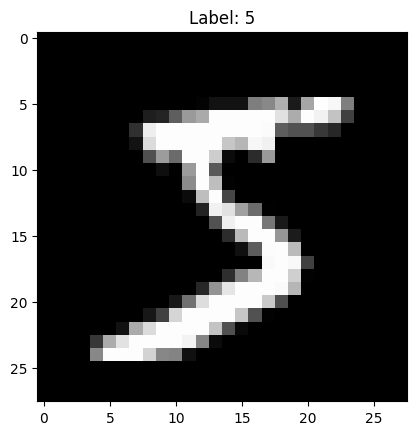

In [6]:
train_images_path = "..\\dataset\\train-images.idx3-ubyte" 
train_labels_path = '..\\dataset\\train-labels.idx1-ubyte'
test_images_path =  '..\\dataset\\t10k-images.idx3-ubyte'
test_labels_path = '..\\dataset\\t10k-labels.idx1-ubyte'


# Function to load images
def load_images(file_path):
    with open(file_path, 'rb') as f:
        # Read the first 16 bytes for metadata (magic number, number of images, rows, cols)
        magic, num_images, rows, cols = struct.unpack(">IIII", f.read(16))
        print(rows,cols)
        
        # Read the image data and reshape it to (num_images, rows, cols)
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, rows, cols)
        
    return images

# Function to load labels
def load_labels(file_path):
    with open(file_path, 'rb') as f:
        # Read the first 8 bytes for metadata (magic number, number of labels)
        magic, num_labels = struct.unpack(">II", f.read(8))
        
        # Read the label data
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        
    return labels

train_images = load_images(train_images_path)
train_labels = load_labels(train_labels_path)
test_images = load_images(test_images_path)
test_labels = load_labels(test_labels_path)

# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

In [7]:

print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")


Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


## Model Creation

In [8]:

# Create the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 image into a 1D array of 784 pixels
    layers.Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    layers.Dense(10, activation='softmax')  # Output layer with 10 units for digits 0-9
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [9]:

model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2931 - accuracy: 0.9150
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1430 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1062 - accuracy: 0.9682
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0852 - accuracy: 0.9737
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0743 - accuracy: 0.9763
313/313 - 1s - loss: 0.0731 - accuracy: 0.9780 - 1s/epoch - 4ms/step


In [10]:
print(f"Test accuracy: {test_acc}")

Test accuracy: 0.9779999852180481


In [11]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


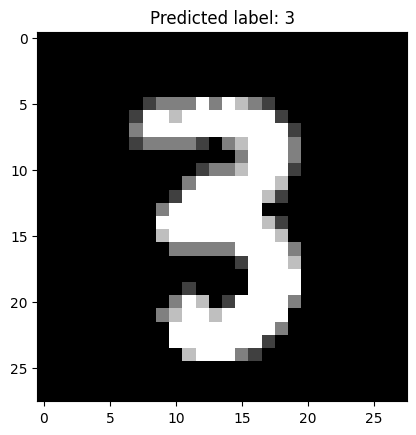

In [12]:
image_no=68
plt.imshow(test_images[image_no], cmap='gray')
plt.title(f"Predicted label: {np.argmax(predictions[image_no])}")
plt.show()

In [13]:
import tensorflow as tf

# Assuming your model is stored in a variable called `model`
model.save('model.h5')


In [14]:
from tensorflow.keras.models import load_model

loaded_model = load_model('model.h5')
loaded_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
